In [83]:
import numpy as np
import pylab as pl
import random as rn
import time
import scipy

!pip install emcee
!pip install corner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 999.3 kB/s eta 0:00:00


Question 1

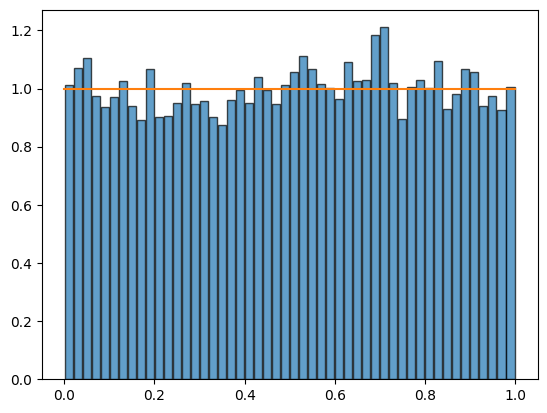

In [11]:
#linear COngruential random number generator

N=10000

def rand(x0,N):
  r=[]
  x=x0
  m=98374722
  for i in range(N):
    r.append(x)
    x=(89822635*x+2329113)% m
  r=np.array(r)/m
  return r

#seed=int(input("Enter a seed:"))
seed=2324
st1=time.time()
x=rand(seed,N)
et1=time.time()

pl.hist(x,bins=50,density=True,edgecolor='black',rwidth=0.9,alpha=0.7)

pl.plot([0,1],[1,1])


Question 2

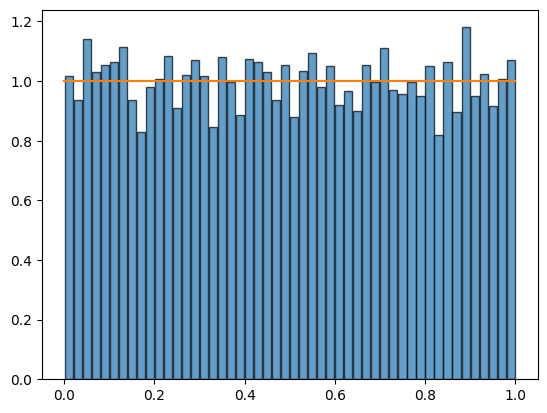

In [13]:
#using python library
N=10000
r=[]
st2=time.time()
for i in range(N):
  r.append(np.random.rand())
et2=time.time()

pl.hist(r,bins=50,density=True,edgecolor='black',rwidth=0.9,alpha=0.7)

pl.plot([0,1],[1,1])


Question 3

In [14]:
print("To produce 10,000 uniform deviates;")

print("Time taken by Linear congruential generator is (in sec):",np.round(et1-st1,5))

print("Time taken by python library is (in sec):\t\t",np.round(et2-st2,5))

To produce 10,000 uniform deviates;
Time taken by Linear congruential generator is (in sec): 0.02294
Time taken by python library is (in sec):		 0.01057


Question 5

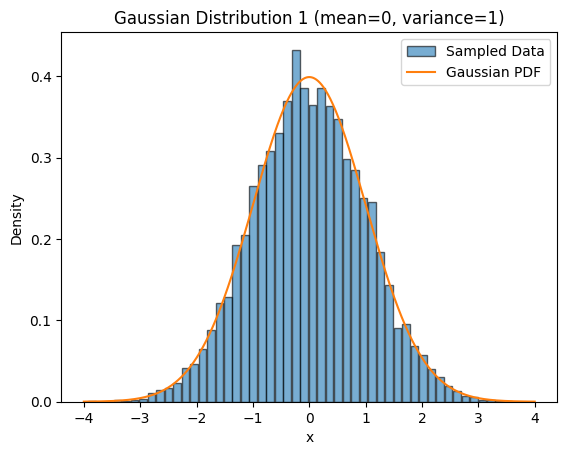

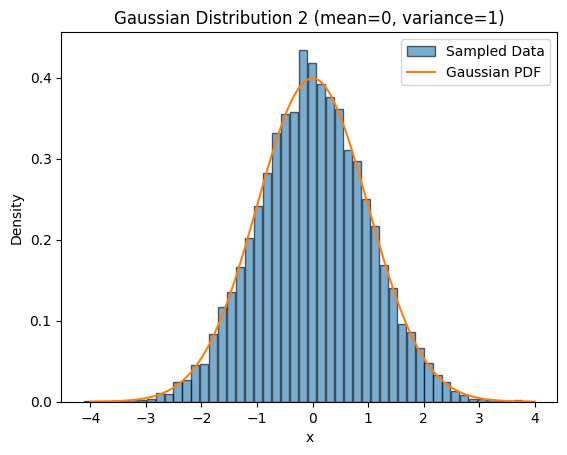

In [46]:
#Box-Muller transform

def box_muller(s):
    u1 = np.random.uniform(0, 1, s)
    u2 = np.random.uniform(0, 1, s)

    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    return z0,z1

n = 10000 # no. of samples

sample= box_muller(n)
# Plotting the density histogram of the samples
for i in range(1,3):
  pl.figure(i)
  pl.hist(sample[i-1], bins=50, density=True, alpha=0.6, label='Sampled Data',edgecolor='black',rwidth=0.9)
  x = np.linspace(-4, 4, 1000)
  def pdf(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

  pl.plot(x, pdf(x), label='Gaussian PDF')
  pl.title('Gaussian Distribution '+str(i)+' (mean=0, variance=1)')
  pl.xlabel('x')
  pl.ylabel('Density')
  pl.legend()
  pl.show()



Question 6

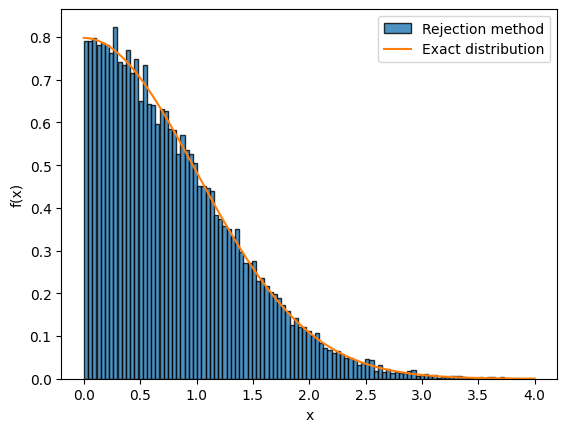

In [35]:
#rejection method
def f(x):
  return np.sqrt(2/np.pi)*np.exp(-x**2/2)


N=100000
samples=[]
s=4
for i in range(N):
  r=np.random.rand()
  x=np.random.rand()*s
  if(r<=f(x)):
    samples.append(x)

pl.hist(samples,bins=100, density=True,alpha=0.8,label='Rejection method',rwidth=0.96,edgecolor='black')


x=np.linspace(0,s,100)
pl.plot(x,f(x),label='Exact distribution')

pl.xlabel('x')
pl.ylabel('f(x)')
pl.legend()
pl.show()

Question 7

In [76]:
#Chi squared test

score=[i for i in range(2,13)]
obs1=[4,10,10,13,20,18,18,11,13,14,13]
obs2=[3,7,11,15,19,24,21,17,13,9,5]
prob=np.array([1,2,3,4,5,6,5,4,3,2,1])/36
s=sum(obs1)
print("Chi-squared test")
print("Total number of obs:",s)
expt=prob*s
print("Score\t:",score)
print("Obs1\t:",obs1)
print("Obs2\t:",obs2)
print("Expected:",expt,"\n")
dof=len(obs1)-1 #degree of freedom
x1=0.0
x2=0.0
for i in range(dof+1):
  x1+=(obs1[i]-expt[i])**2/expt[i]
  x2+=(obs2[i]-expt[i])**2/expt[i]
print("V1,V2=",x1,x2)

def chi_test(c):
  p = 1 - scipy.stats.chi2.cdf(c,dof)
  print("P(V)=",p)
  if (p<0.01 or p>0.99):
    s = 'Not sufficiently random'
  elif(0.01<p<0.05 or 0.95<p<0.99):
    s = 'Suspect'
  elif(0.05<p<0.1 or 0.9<p<0.95):
    s = 'Almost suspect'
  else:
    s = 'Sufficiently random'
  return s

print('The first run is',chi_test(x1))
print('The second run is',chi_test(x2))

Chi-squared test
Total number of obs: 144
Score	: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Obs1	: [4, 10, 10, 13, 20, 18, 18, 11, 13, 14, 13]
Obs2	: [3, 7, 11, 15, 19, 24, 21, 17, 13, 9, 5]
Expected: [ 4.  8. 12. 16. 20. 24. 20. 16. 12.  8.  4.] 

V1,V2= 29.491666666666667 1.1416666666666666
P(V)= 0.0010368888967215995
The first run is Not sufficiently random
P(V)= 0.999685063315782
The second run is Not sufficiently random


Question 8,

In [ ]:
#area of circle using Monte carlo

def f(x,y):
  return x**2+y**2

n=100000 # number of random numbers to be generated

def area(n,d):
  c=0.
  for k in range(n):
    s=0.
    for i in range(d):
      r=rn.uniform(-1,1)
      s=r**2+s
    if(s<=1):
      c+=1
  return c/n*2**d  #2**d is the volume of d dim cube

print("Number of monte carlo steps:",n,"\n")
print("Area of unit circle:",area(n,2))
print("\nVolume of ten-dim unit sphere:",area(n,10))
print("Actual value :",np.pi**5/(5*4*3*2))

Number of monte carlo steps: 100000 

Area of unit circle: 3.13596

Volume of ten-dim unit sphere: 2.47808
Actual value : 2.550164039877345


Question 9

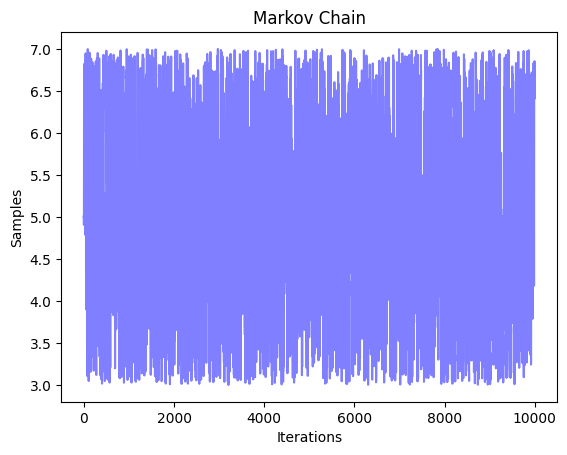

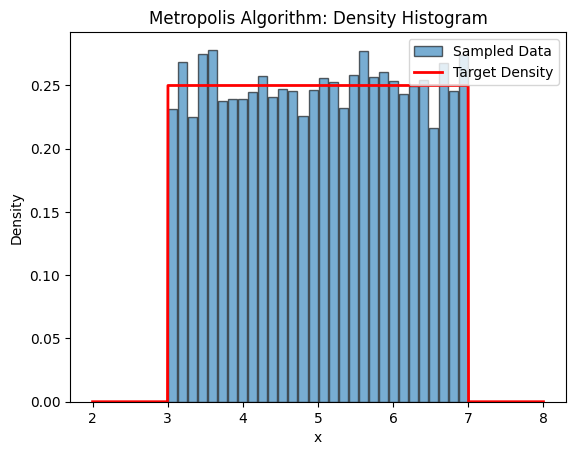

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if 3 <= x <= 7:
        return 1 / (7 - 3)
    else:
        return 0

# proposal distribution: normal distribution
def proposal_distribution(x, sigma=1):
    return np.random.normal(x, sigma)

# Metropolis algorithm
def metropolis_algorithm(i, initial_value, proposal_sigma):
    samples = [initial_value]
    current_value = initial_value

    for _ in range(i):
        proposed_value = proposal_distribution(current_value, proposal_sigma)
        accept = min(1, f(proposed_value) / f(current_value))

        if np.random.rand() < accept:
            current_value = proposed_value
        samples.append(current_value)

    return samples

# Parameters
n = 10000
initial_value = 5
proposal_sigma = 1

samples = metropolis_algorithm(n, initial_value, proposal_sigma)

# Plot the Markov Chain
plt.plot(samples, color='b', alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Samples')
plt.title('Markov Chain')
plt.show()

plt.hist(samples, bins=30, density=True, alpha=0.6, edgecolor='black',rwidth=0.9, label='Sampled Data')


x = np.linspace(2, 8, 1000)
y = [f(val) for val in x]
plt.plot(x, y, 'r-', lw=2, label='Target Density')

plt.title('Metropolis Algorithm: Density Histogram')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


Question 10

Column 1: Measurement number
Column 2: x
Column 3: y
Column 4: sigma

1	201	592	61
2	244	401	25
3	 47	583	38
4	287	402	15
5	203	495	21
6	 58	173	15
7	210	479	27
8	202	504	14
9	198	510	30
10	158	416	16
11	165	393	14
12	201	442	25
13	157	317	52
14	131	311	16
15	166	400	34
16	160	337	31
17	186	423	42
18	125	334	26
19	218	533	16
20	146	344	22

In [102]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner
from scipy.optimize import minimize

# Given data
x = np.array([201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146])
y = np.array([592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344])
yerr = np.array([61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22])


def model(th, x):
  a,b,c = th
  return a*x**2+b*x+c


def log_likelihood(theta, x, y, yerr):
    model_y = model(theta, x)
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model_y)**2 / sigma2 + np.log(2 * np.pi * sigma2))


def log_prior(theta):
  return 0

def log_posterior(theta, x, y, yerr):
    lp = log_prior(theta)
    #if not np.isfinite(lp):
     #   return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


ndim = 3
nwalkers = 50
nsteps = 4000

#Initializing
initial = np.array([0.0,3.0,100.0])
nll = lambda *args: -log_likelihood(*args)
soln = minimize(nll,initial,args=(x,y,yerr))
pos = soln.x + 1e-4 * np.random.randn(nwalkers, ndim)




# Create the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, yerr))

# Run the MCMC sampler
sampler.run_mcmc(pos, nsteps, progress=True)

# Analyze the results
samples = sampler.get_chain();


100%|██████████| 4000/4000 [00:11<00:00, 351.37it/s]


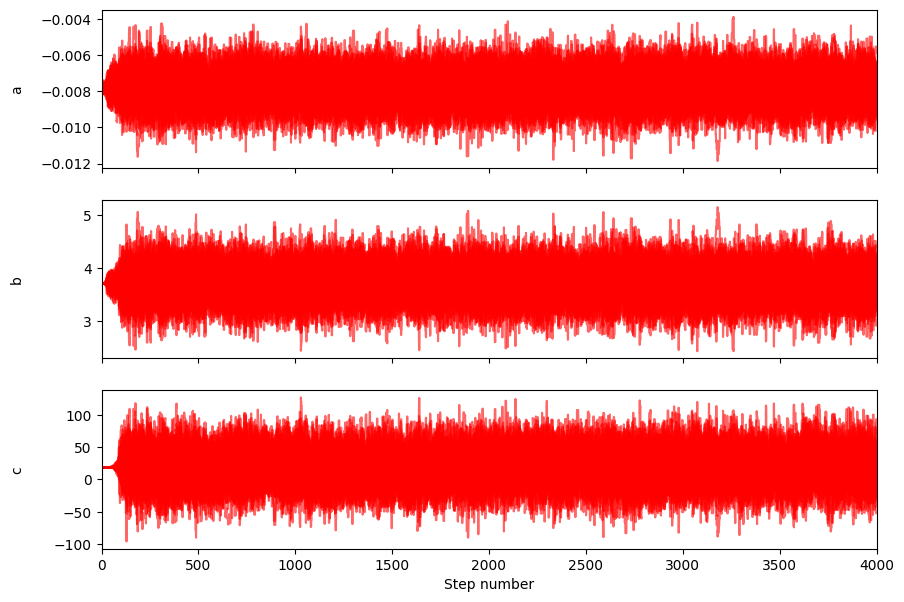

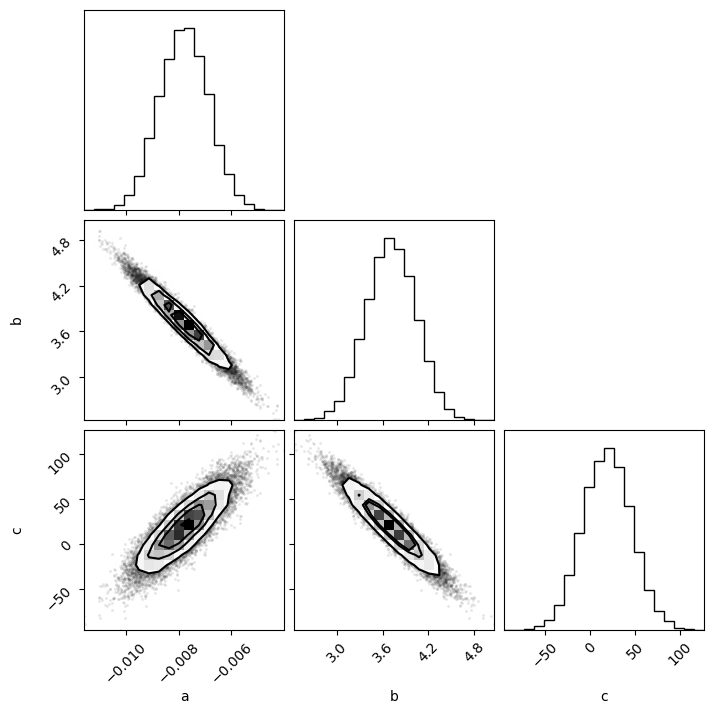

The median values of
a: -0.008,  b:  3.713, c: 19.109
The one sigma uncertainties of
a:(- 0.001,+ 0.001), b:(- 0.325,+ 0.322), c:(- 26.928,+ 26.720)


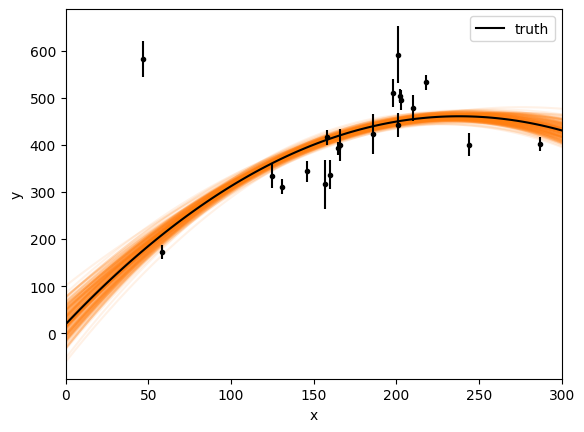

In [103]:
#plotting the MARKOV chains


fig, axes = plt.subplots(3,figsize=(10,7),sharex=True)
labels = ['a','b','c']
for i in range(ndim):
  ax = axes[i]
  ax.plot(samples[:,:,i],'red',alpha=0.6)
  ax.set_xlim(0,len(samples))
  ax.set_ylabel(labels[i])
  ax.yaxis.set_label_coords(-0.1,0.5)
axes[-1].set_xlabel('Step number');


# Plot the corner plot
samples = sampler.get_chain(discard=100, thin=10, flat=True)
fig = corner.corner(samples, labels=["a", "b","c"])
plt.show()


a_med ,b_med, c_med = np.median(samples, axis=0)
per = np.percentile(samples,[16,50,84],axis=0)
#a_med,b_med,c_med = per[1]
a_err_min,a_err_max = np.diff(per[:,0])
b_err_min,b_err_max = np.diff(per[:,1])
c_err_min,c_err_max = np.diff(per[:,2])

print("The median values of")
print(f"a: {a_med: .3f},  b: {b_med: .3f}, c:{c_med: .3f}")
print("The one sigma uncertainties of")
print(f"a:(-{a_err_min: .3f},+{a_err_max: .3f}), b:(-{b_err_min: .3f},+{b_err_max: .3f}), c:(-{c_err_min: .3f},+{c_err_max: .3f})")

inds = np.random.randint(len(samples),size=200)
x0 = np.linspace(0,300,100)
for ind in inds:
  sample = samples[ind]
  plt.plot(x0,np.dot(np.vander(x0,3),sample[:3]),'C1',alpha=0.1)
plt.errorbar(x,y,yerr=yerr,fmt='.k',capsize=0)
plt.plot(x0,model([a_med,b_med,c_med],x0),'k',label='truth')
plt.legend()
plt.xlim(0,300)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Acknowledgement: *The solution of the last question was explained by Tushar*